In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import vincent
sns.set_style('whitegrid')
%matplotlib inline

/Users/babou/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Chargement des fichiers de données :

In [48]:
# load files
france = pd.read_csv('data/output.csv', sep=";", dtype={'COM' : np.dtype(str)}, encoding='utf-8')
gironde = pd.read_csv('data/gironde.csv', sep=";", dtype={'COM' : np.dtype(str)}, encoding='utf-8')
commune_metropole = pd.read_csv('data/commune_metropole.csv')

### Nettoyage et aggrégation des fichiers

In [49]:
france = france.merge(commune_metropole, on='COM', how='left')
# 3 villes n'ont pas de données ['760950101', '760950102', '760950103']
gironde = gironde.merge(commune_metropole, on='COM', how='left')
gironde = gironde.drop('index', axis=1)

In [50]:
status_mapping = {'Commune simple' : 0,
                      'Chef-lieu canton' : 1,
                      'Sous-pr\xc3\xa9fecture' : 2, # Sous-Préfecture
                      'Pr\xc3\xa9fecture' : 3, # Préfecture
                      'Pr\xc3\xa9fecture de r\xc3\xa9gion' : 4, #Préfecture de région
                      "Capitale d'\xc3\xa9tat" : 5} # Capital d'état
gironde['status_rank'] = gironde['status'].map(status_mapping)
france['status_rank'] = france['status'].map(status_mapping)

In [51]:
gironde.head()

,CODGEO,LIBGEO,COM,LIBCOM,REG,DEP,ARR,CV,ZE2010,UU2010,...,C12_ACTOCC15P_MAR,C12_ACTOCC15P_DROU,C12_ACTOCC15P_VOIT,C12_ACTOCC15P_TCOM,status,mean_altitude,superficie,is_metropole,metropole_name,status_rank
0,330030101,Chemin De La Vie,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,...,7.610643,59.228475,1514.417522,140.335529,Commune simple,9.0,2467.0,1,Bordeaux,0
1,330030102,Lagrave-Le Bourg,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,...,54.168218,53.036032,1213.471934,120.798974,Commune simple,9.0,2467.0,1,Bordeaux,0
2,330030103,Sabaeges,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,...,26.257445,39.617534,967.996525,154.180136,Commune simple,9.0,2467.0,1,Bordeaux,0
3,330030104,Parabelle,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,...,19.983212,51.732976,1346.640003,139.001876,Commune simple,9.0,2467.0,1,Bordeaux,0
4,33003ZZZZ,Non Localisé À L'Iris,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,...,NaN,NaN,NaN,NaN,Commune simple,9.0,2467.0,1,Bordeaux,0


#### Métropole de bordeaux

In [52]:
# Only for metropole Bordeaux
metropole_bdx = gironde.loc[gironde.metropole_name == 'Bordeaux']
metropole_bdx.shape

(294, 1037)

In [53]:
key = ['CODGEO',
        'LIBGEO',
        'COM',
        'LIBCOM',
        'REG',
        'DEP',
        'ARR',
        'CV',
        'ZE2010',
        'UU2010',
        'TRIRIS',
        'REG2016',
        'status_rank',
        'is_metropole']

In [54]:
features = [col for col in metropole_bdx.columns if col not in key]

In [55]:
metropole_bdx[key].head()

,CODGEO,LIBGEO,COM,LIBCOM,REG,DEP,ARR,CV,ZE2010,UU2010,TRIRIS,REG2016,status_rank,is_metropole
0,330030101,Chemin De La Vie,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,330011,75,0,1
1,330030102,Lagrave-Le Bourg,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,330021,75,0,1
2,330030103,Sabaeges,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,330011,75,0,1
3,330030104,Parabelle,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,330021,75,0,1
4,33003ZZZZ,Non Localisé À L'Iris,33003,Ambarès-et-Lagrave,72,33,332.0,3319.0,7204.0,33701,NaN,75,0,1


#### Grouper les données pour l'ensemble des métropole de France

In [56]:
# Sum all features
metropole_sum = france[features][france.is_metropole == 1].groupby('metropole_name').sum().reset_index()
metropole_sum.head()

,metropole_name,NB_B101,NB_B102,NB_B103,NB_B201,NB_B202,NB_B203,NB_B204,NB_B205,NB_B206,...,P12_ACTOCC15P_ILT5,P12_ACTOCC15P_ILT45D,C12_ACTOCC15P,C12_ACTOCC15P_PAS,C12_ACTOCC15P_MAR,C12_ACTOCC15P_DROU,C12_ACTOCC15P_VOIT,C12_ACTOCC15P_TCOM,mean_altitude,superficie
0,Bordeaux,18.0,89.0,42.0,44.0,217.0,385.0,169.0,17.0,26.0,...,375.326266,NaN,315398.253489,9154.443892,20158.046550,24129.383739,208231.699409,53724.679898,6815.0,969169.0
1,Brest,8.0,29.0,6.0,8.0,29.0,97.0,44.0,8.0,16.0,...,129.205867,NaN,82987.131510,2507.613904,6320.578554,3367.858679,61279.056005,9512.024368,5792.0,412218.0
2,Grenoble,6.0,33.0,12.0,37.0,106.0,192.0,91.0,6.0,8.0,...,341.440246,NaN,185680.285698,5479.800653,15946.430502,15593.498465,112178.102149,36482.453930,73562.0,272420.0
3,Lille,23.0,148.0,33.0,63.0,376.0,493.0,264.0,25.0,14.0,...,12963.702831,NaN,440833.385317,13747.865175,31634.209792,16058.100643,302423.675325,76969.534382,15476.0,832162.0
4,Montpellier,7.0,39.0,9.0,26.0,179.0,215.0,118.0,8.0,21.0,...,373.556738,NaN,169548.999584,5459.065915,13383.140507,12424.520266,113863.952781,24418.320115,7873.0,624365.0


In [57]:
# Mean all features
metropole_mean = france[features][france.is_metropole == 1].groupby('metropole_name').mean().reset_index()
metropole_mean.head()

,metropole_name,NB_B101,NB_B102,NB_B103,NB_B201,NB_B202,NB_B203,NB_B204,NB_B205,NB_B206,...,P12_ACTOCC15P_ILT5,P12_ACTOCC15P_ILT45D,C12_ACTOCC15P,C12_ACTOCC15P_PAS,C12_ACTOCC15P_MAR,C12_ACTOCC15P_DROU,C12_ACTOCC15P_VOIT,C12_ACTOCC15P_TCOM,mean_altitude,superficie
0,Bordeaux,0.067416,0.333333,0.157303,0.164794,0.812734,1.441948,0.632959,0.063670,0.097378,...,1.369804,NaN,1151.088516,33.410379,73.569513,88.063444,759.969706,196.075474,23.180272,3296.493197
1,Brest,0.088889,0.322222,0.066667,0.088889,0.322222,1.077778,0.488889,0.088889,0.177778,...,1.389310,NaN,892.334747,26.963590,67.963210,36.213534,658.914581,102.279832,59.102041,4206.306122
2,Grenoble,0.038462,0.211538,0.076923,0.237179,0.679487,1.230769,0.583333,0.038462,0.051282,...,1.733199,NaN,942.539521,27.816247,80.946348,79.154815,569.431991,185.190121,350.295238,1297.238095
3,Lille,0.051111,0.328889,0.073333,0.140000,0.835556,1.095556,0.586667,0.055556,0.031111,...,26.031532,NaN,885.207601,27.606155,63.522510,32.245182,607.276456,154.557298,29.035647,1561.279550
4,Montpellier,0.066038,0.367925,0.084906,0.245283,1.688679,2.028302,1.113208,0.075472,0.198113,...,2.349413,NaN,1066.345909,34.333748,84.170695,78.141637,716.125489,153.574340,47.715152,3784.030303


## Fonctions

In [58]:
def augmentation(depart, arrive):
    """
    Calcul de l'augmentation entre 2 valeurs :
    # ( ( valeur d'arrivée - valeur de départ ) / valeur de départ ) x 100
    """
    return ((arrive - depart) / depart) * 100

In [59]:
def remove_number_from_string(s):
    """
    input : string
    return :
    remove all number in string.
    """
    return ''.join([i for i in s if not i.isdigit()]).rstrip()

In [60]:
def percent_pop(echantillon, population, nb_round=2):
    """
    echantillon : sub population
    populaiton : full population
    nb_round : To round the percent (2 by defaut)
    Return :
    Percent echantillon in population
    """
    return round(((echantillon / population) * 100), nb_round)

In [61]:
def get_data_11_12_sum_percent(feature12, feature11, pop12, pop11, all_city=False):
    """
    Get data in percent & improvement for 2 feautures (2011, 2012) and their population
    Create percent11 (pourcent of feature 2011 and his population)
    Create percent12 (pourcent of feature 2012 and his population)
    Create improvement between percent 2011 & 2012
    all_city : bool to control the return of all city DF (opt)
    Return :
    - DF of metropole Bordeaux
    - DF by metropole (11 metropole in French)
    - mean france 2011
    - mean france 2012
    - DF by city (all french) sorted by percent12 (drop NaN value)
    """
    # Bordeaux Metropole
    metropole_bdx_feature = metropole_bdx.groupby(['COM', 'LIBCOM']) \
                            [feature12, feature11, pop12, pop11].sum().reset_index()
    metropole_bdx_feature['percent11'] = (metropole_bdx_feature[feature11] / 
                                          metropole_bdx_feature[pop11])*100
    metropole_bdx_feature['percent12'] = (metropole_bdx_feature[feature12] / 
                                          metropole_bdx_feature[pop12])*100
    metropole_bdx_feature['improvement'] = augmentation(metropole_bdx_feature.percent11, 
                                                        metropole_bdx_feature.percent12)
    
    # France
    france_feature = france.groupby(['COM', 'LIBCOM', 'status_rank'])[feature12, feature11, pop12, pop11].sum().reset_index()
    france_feature['percent11'] = (france_feature[feature11] / france_feature[pop11])*100
    france_feature['percent12'] = (france_feature[feature12] / france_feature[pop12])*100
    
    mean_france_11 = round(france_feature['percent11'].mean(), 2)                                            
    mean_france_12 = round(france_feature['percent12'].mean(), 2)
    
    france_feature.dropna(subset=['percent12'], how='all', inplace=True)
    france_feature['improvement'] = augmentation(france_feature['percent11'],
                                                 france_feature['percent12'])
    france_feature = france_feature.sort_values('percent12', ascending=0).reset_index(drop=True)
    
    # All Metropole
    metropole_feature = metropole_sum[['metropole_name', feature12, feature11, pop12, pop11]].copy()
    metropole_feature['percent11'] = (metropole_sum[feature11] / metropole_sum[pop11]) * 100
    metropole_feature['percent12'] = (metropole_sum[feature12] / metropole_sum[pop12]) * 100
    metropole_feature['improvement'] = augmentation(metropole_feature['percent11'],
                                                   metropole_feature['percent12'])
    
    if all_city == False:
        return metropole_bdx_feature,metropole_feature, mean_france_11, mean_france_12
    else:
        return metropole_bdx_feature,metropole_feature, mean_france_11, mean_france_12, france_feature

## Nombre de personnes qui utilisent la voiture pour aller travailler


In [215]:
car_bdx, car_metropole, mean_car_fr_11, mean_car_fr_12 =  get_data_11_12_sum_percent('C12_ACTOCC15P_VOIT', 'C11_ACTOCC15P_VOIT',
                                                            'P12_POP1564', 'P11_POP1564')

In [122]:
car_bdx.sort_values('percent12')

,COM,LIBCOM,C12_ACTOCC15P_VOIT,C11_ACTOCC15P_VOIT,P12_POP1564,P11_POP1564,percent11,percent12,improvement
6,33063,Bordeaux,48060.213299,48799.164253,174534.155565,173707.698852,28.092689,27.536280,-1.980621
26,33522,Talence,10323.493516,10368.491065,30513.023499,30086.000746,34.462843,33.833073,-1.827387
11,33119,Cenon,4871.934938,4983.841151,14291.842148,14127.110409,35.278560,34.088922,-3.372128
16,33249,Lormont,4627.707891,4509.896127,13367.501521,13201.232028,34.162691,34.619094,1.335968
13,33167,Floirac,4647.928584,4668.171807,10792.520593,10890.989138,42.862698,43.066201,0.474778
4,33039,Bègles,7566.454611,7583.696341,16892.800335,16654.196974,45.536247,44.791002,-1.636597
20,33318,Pessac,18302.189296,18225.528188,40334.938078,40075.044025,45.478498,45.375523,-0.226425
14,33192,Gradignan,7264.317819,7224.008884,15571.773620,15178.174563,47.594715,46.650549,-1.983763
8,33069,Le Bouscat,7113.465245,7195.797640,14710.811853,14745.733130,48.799185,48.355355,-0.909504
18,33281,Mérignac,21932.908581,22028.558901,45192.499149,44779.150924,49.193784,48.532188,-1.344878


In [123]:
print "Moyenne française est de " + str(mean_car_fr_11) +"% (2011) et " +str(mean_car_fr_12)+\
"% (2012) sur l'ensemble des communes"

Moyenne française est de 55.47% (2011) et 56.02% (2012) sur l'ensemble des communes


In [125]:
car_metropole.sort_values('percent12').reset_index(drop=True)

,metropole_name,C12_ACTOCC15P_VOIT,C11_ACTOCC15P_VOIT,P12_POP1564,P11_POP1564,percent11,percent12,improvement
0,Strasbourg,109387.756750,110145.294190,321898.284368,320890.743198,34.324859,33.982088,-0.998609
1,Nice,124067.371558,125035.820113,333668.430199,335808.809039,37.234229,37.182832,-0.138037
2,Montpellier,113863.952781,112637.282501,297929.016130,294079.885086,38.301594,38.218484,-0.216988
3,Grenoble,112178.102149,112880.782653,292450.764691,292842.114520,38.546636,38.357945,-0.489514
4,Rennes,118397.871923,118196.572269,292922.951991,289403.409049,40.841458,40.419459,-1.033262
5,Lille,302423.675325,302677.703395,747662.766390,745403.074398,40.605910,40.449209,-0.385907
6,Bordeaux,208231.699409,207506.371166,506093.987336,500857.953646,41.430184,41.144867,-0.688668
7,Toulouse,209807.637776,208920.689602,508549.173741,503062.685305,41.529753,41.256116,-0.658893
8,Nantes,168483.240321,167552.014965,407653.495190,402921.312497,41.584302,41.330012,-0.611503
9,Rouen,133840.099577,136860.989128,317014.466585,321696.216714,42.543549,42.218925,-0.763041


## Nombre de personnes qui utilisent un 2 roues pour aller travailler

In [289]:
bike_bdx, bike_metropole, mean_bike_fr_11, \
mean_bike_fr_12, bike_france =  get_data_11_12_sum_percent('C12_ACTOCC15P_DROU', 'C11_ACTOCC15P_DROU',
                                                            'P12_POP1564', 'P11_POP1564', all_city=True)

In [206]:
bike_bdx.sort_values('percent12')

,COM,LIBCOM,C12_ACTOCC15P_DROU,C11_ACTOCC15P_DROU,P12_POP1564,P11_POP1564,percent11,percent12,improvement
22,33434,Saint-Louis-de-Montferrand,19.818356,19.636711,1412.057839,1397.152008,1.405481,1.403509,-0.140351
16,33249,Lormont,198.605687,187.794972,13367.501521,13201.232028,1.422556,1.485735,4.441221
19,33312,Parempuyre,104.519534,105.039068,5444.592502,5454.975193,1.925565,1.919694,-0.304856
2,33013,Artigues-près-Bordeaux,111.233327,105.785393,5488.708626,5264.562869,2.009386,2.026585,0.855913
0,33003,Ambarès-et-Lagrave,203.615017,199.162366,9157.472857,8848.707819,2.250751,2.223485,-1.211420
11,33119,Cenon,318.411304,314.185125,14291.842148,14127.110409,2.223987,2.227923,0.176992
21,33376,Saint-Aubin-de-Médoc,103.006252,102.611491,4249.482520,4239.442209,2.420401,2.423972,0.147533
10,33096,Carbon-Blanc,106.698881,82.838047,4368.242801,4360.080577,1.899920,2.442604,28.563521
17,33273,Martignas-sur-Jalle,124.920379,124.000000,5072.545521,4994.000000,2.482980,2.462676,-0.817696
7,33065,Bouliac,52.274384,52.000000,2063.590311,2050.000000,2.536585,2.533176,-0.134390


In [144]:
print "Moyenne française est de " + str(mean_bike_fr_11) +"% (2011) et " +str(mean_bike_fr_11)+\
"% (2012) sur l'ensemble des communes"

Moyenne française est de 1.5% (2011) et 1.5% (2012) sur l'ensemble des communes


In [145]:
bike_metropole.sort_values('percent12').reset_index(drop=True)

,metropole_name,C12_ACTOCC15P_DROU,C11_ACTOCC15P_DROU,P12_POP1564,P11_POP1564,percent11,percent12,improvement
0,Rouen,5982.375395,6314.535321,317014.466585,321696.216714,1.962888,1.887099,-3.861103
1,Lille,16058.100643,16469.060799,747662.766390,745403.074398,2.209417,2.147773,-2.790039
2,Brest,3367.858679,3374.831895,139055.790134,139172.612360,2.424925,2.421948,-0.122787
3,Rennes,9872.994887,9699.410215,292922.951991,289403.409049,3.351519,3.370509,0.566613
4,Nantes,15399.276632,14833.006860,407653.495190,402921.312497,3.681366,3.777541,2.612482
5,Montpellier,12424.520266,12203.400491,297929.016130,294079.885086,4.149689,4.170295,0.496580
6,Toulouse,21972.689673,21289.728101,508549.173741,503062.685305,4.232023,4.320662,2.094479
7,Bordeaux,24129.383739,23413.265565,506093.987336,500857.953646,4.674632,4.767767,1.992359
8,Grenoble,15593.498465,15027.973762,292450.764691,292842.114520,5.131767,5.332008,3.902000
9,Nice,18373.040516,19037.032818,333668.430199,335808.809039,5.669009,5.506377,-2.868803


La métropole de Bordeaux est en 4ème position sur l'utilisation des 2 roues pour aller travailler.

(51989, 1037)

In [290]:
#bike_france.dropna(subset=['percent12'], how='all', inplace=True)
#au moins Chef-lieu de Canton ou supérieur
bike_france = bike_france[bike_france.status_rank >= 2]
bike_france.reset_index(drop=True, inplace=True) 
bike_france.head(10)

,COM,LIBCOM,status_rank,C12_ACTOCC15P_DROU,C11_ACTOCC15P_DROU,P12_POP1564,P11_POP1564,percent11,percent12,improvement
0,13207,Marseille 7e Arrondissement,4,1841.008897,1793.220003,22224.377125,22522.158603,7.962025,8.283737,4.040571
1,75103,Paris 3e Arrondissement,5,2245.619157,2150.186262,27159.292179,27352.870837,7.860916,8.268327,5.182742
2,38185,Grenoble,3,8455.109713,8064.610244,109735.304919,109664.062409,7.353923,7.705004,4.774071
3,75109,Paris 9e Arrondissement,5,3237.009819,3220.452837,43659.344017,44356.672062,7.260357,7.414243,2.119534
4,67482,Strasbourg,4,13930.451406,13690.029864,190733.391836,189895.120986,7.209258,7.303625,1.308963
5,75110,Paris 10e Arrondissement,5,5100.109136,4801.115102,69943.024309,69818.432561,6.876572,7.291805,6.038369
6,33063,Bordeaux,4,12195.810142,11836.402413,174534.155565,173707.698852,6.813977,6.987635,2.548561
7,75111,Paris 11e Arrondissement,5,7692.929712,7341.103099,115701.125871,115577.183328,6.351689,6.648967,4.680301
8,75102,Paris 2e Arrondissement,5,1157.450188,1202.403273,17475.667388,17877.139563,6.725927,6.623210,-1.527170
9,13208,Marseille 8e Arrondissement,4,3068.019563,2943.858196,47729.651160,48104.146054,6.119760,6.427911,5.035350


In [274]:
rank_france = bike_france.index[bike_france.LIBCOM == 'Bordeaux'][0] + 1
print "Bordeaux est classé " + str(rank_france) + " parmis l'ensemblre de communes Française (sup à chef de canton)"

Bordeaux est classé 7 parmis l'ensemblre de communes Française (sup à chef de canton)


In [275]:
rank_france

7

## Nbr de personnes qui utilisent les transports en commun pour aller travailler

In [43]:
use_commun = metropole_bdx.groupby(['COM', 'LIBCOM'])['C12_ACTOCC15P_PAS', 'P12_POP1564'].sum().reset_index()

In [44]:
use_commun['percent'] = (use_commun['C12_ACTOCC15P_PAS'] / use_commun['P12_POP1564'])*100

In [45]:
use_commun.sort_values('percent')

,COM,LIBCOM,C12_ACTOCC15P_PAS,P12_POP1564,percent
14,33192,Gradignan,176.095856,15571.773620,1.130866
2,33013,Artigues-près-Bordeaux,64.164655,5488.708626,1.169030
19,33312,Parempuyre,64.319713,5444.592502,1.181350
15,33200,Le Haillan,80.000000,6547.000000,1.221934
11,33119,Cenon,180.804268,14291.842148,1.265087
13,33167,Floirac,140.366171,10792.520593,1.300587
20,33318,Pessac,560.248186,40334.938078,1.388990
3,33032,Bassens,63.779357,4483.550652,1.422519
16,33249,Lormont,194.930708,13367.501521,1.458243
21,33376,Saint-Aubin-de-Médoc,64.810192,4249.482520,1.525131


Moyenne française est de 4.672 % (sur l'ensemble des communes)

## Nbr de personnes célibataire ?

In [296]:

celib_bdx, celib_metropole, mean_celib_fr_11, \
mean_celib_fr_12, celib_france =  get_data_11_12_sum_percent('P12_POP15P_CELIB', 'P11_POP15P_CELIB',
                                                            'P12_POP15P', 'P11_POP15P', all_city=True)

In [300]:
celib_bdx.sort_values('percent12')

,COM,LIBCOM,P12_POP15P_CELIB,P11_POP15P_CELIB,P12_POP15P,P11_POP15P,percent11,percent12,improvement
21,33376,Saint-Aubin-de-Médoc,1388.855210,1388.161685,5066.676407,5040.973588,27.537571,27.411563,-0.457585
7,33065,Bouliac,759.874062,755.000000,2617.755743,2597.000000,29.072006,29.027692,-0.152431
23,33449,Saint-Médard-en-Jalles,7328.741660,7144.482395,23403.032088,23076.672507,30.959760,31.315351,1.148559
10,33096,Carbon-Blanc,1976.413483,1840.838164,5900.751587,5755.005473,31.986732,33.494267,4.713001
25,33519,Le Taillan-Médoc,2530.675049,2186.052836,7461.876539,7379.884103,29.621777,33.914727,14.492545
2,33013,Artigues-près-Bordeaux,2156.368418,2075.138871,6333.428824,6047.016574,34.316739,34.047409,-0.784834
17,33273,Martignas-sur-Jalle,2058.038221,2032.000000,5945.046006,5842.000000,34.782609,34.617701,-0.474111
19,33312,Parempuyre,2261.776696,2269.483455,6454.726527,6466.403100,35.096535,35.040628,-0.159297
1,33004,Ambès,827.937845,825.000000,2268.591491,2252.000000,36.634103,36.495678,-0.377858
3,33032,Bassens,2081.823722,2041.182626,5693.405973,5649.797945,36.128418,36.565524,1.209867


In [346]:
#gironde.head()
gironde_celib = gironde[['CODGEO', 'LIBGEO', 'COM', 'LIBCOM', 'P12_POP15P_CELIB', 'P11_POP15P_CELIB','P12_POP15P', 'P11_POP15P']].copy()
gironde_celib['percent12'] = (gironde_celib['P12_POP15P_CELIB'] / gironde_celib['P12_POP15P'])*100
gironde_celib = gironde_celib.loc[gironde_celib.P12_POP15P >= 100]
gironde_celib[gironde_celib.LIBCOM == 'Bordeaux'].sort_values('percent12', ascending=0).head(10)


,CODGEO,LIBGEO,COM,LIBCOM,P12_POP15P_CELIB,P11_POP15P_CELIB,P12_POP15P,P11_POP15P,percent12
103,330631103,Capucins-Victoire 3,33063,Bordeaux,2190.615398,2186.697244,2540.679397,2561.640819,86.221638
107,330631107,Capucins-Victoire 7,33063,Bordeaux,1839.873154,1798.886994,2138.514831,2069.966051,86.035090
106,330631106,Capucins-Victoire 6,33063,Bordeaux,2392.088418,2447.333749,2812.238654,2882.429163,85.059937
102,330631102,Capucins-Victoire 2,33063,Bordeaux,2077.090304,2020.055571,2535.485308,2534.226430,81.920818
104,330631104,Capucins-Victoire 4,33063,Bordeaux,2253.384712,2237.675496,2818.525447,2814.551613,79.949064
59,330630502,Hotel De Ville-Quinconces 2,33063,Bordeaux,3297.531537,3125.553647,4189.551792,3994.782401,78.708456
61,330630504,Hotel De Ville-Quinconces 4,33063,Bordeaux,1598.152453,1607.821949,2038.732398,1990.014060,78.389516
62,330630505,Hotel De Ville-Quinconces 5,33063,Bordeaux,1930.264419,1868.754451,2462.810727,2451.263589,78.376483
108,330631108,Capucins-Victoire 8,33063,Bordeaux,1790.933105,1851.361679,2286.850127,2460.347742,78.314407
65,330630508,Hotel De Ville-Quinconces 8,33063,Bordeaux,1692.789627,1704.983801,2166.213144,2150.912044,78.145109


### Age des Iris de Bordeaux célibataire

In [347]:
gironde_celib_age = gironde_celib.merge(gironde[['CODGEO', 'P12_POP1529', 'P12_POP3044', 'P12_POP4559','P12_POP6074', 'P12_POP75P']], 
                                        how='inner', on='CODGEO')
bdx_celib_age = gironde_celib_age[gironde_celib_age.LIBCOM == 'Bordeaux'].copy()
bdx_celib_age.head()

,CODGEO,LIBGEO,COM,LIBCOM,P12_POP15P_CELIB,P11_POP15P_CELIB,P12_POP15P,P11_POP15P,percent12,P12_POP1529,P12_POP3044,P12_POP4559,P12_POP6074,P12_POP75P
28,330630103,Le Lac 3,33063,Bordeaux,1314.628915,1271.577729,2885.651487,2786.145509,45.557439,889.207648,823.921564,659.209817,356.259623,157.052835
29,330630201,Bacalan 1,33063,Bordeaux,532.430585,441.622613,1094.161595,1030.421515,48.661056,383.534209,234.461263,241.180786,137.028734,97.956604
30,330630202,Bacalan 2,33063,Bordeaux,1041.801463,939.313490,2312.713242,2108.262329,45.046720,543.627582,528.287061,582.251533,380.292169,278.254897
31,330630203,Bacalan 3,33063,Bordeaux,922.014561,868.919893,2147.069852,2138.540013,42.942923,355.402965,491.567313,646.889388,379.068310,274.141875
32,330630204,Bacalan 4,33063,Bordeaux,540.824514,496.060266,1166.469170,1165.781382,46.364236,234.885386,385.489804,286.406496,153.329833,106.357651


In [348]:
bdx_celib_age['P12_POP1529_p'] = bdx_celib_age.apply(lambda row: percent_pop(row.P12_POP1529, row.P12_POP15P), axis=1)
bdx_celib_age['P12_POP3044_p'] = bdx_celib_age.apply(lambda row: percent_pop(row.P12_POP3044, row.P12_POP15P), axis=1)
bdx_celib_age['P12_POP4559_p'] = bdx_celib_age.apply(lambda row: percent_pop(row.P12_POP4559, row.P12_POP15P), axis=1)
bdx_celib_age['P12_POP6074_p'] = bdx_celib_age.apply(lambda row: percent_pop(row.P12_POP6074, row.P12_POP15P), axis=1)
bdx_celib_age['P12_POP75P_p'] = bdx_celib_age.apply(lambda row: percent_pop(row.P12_POP75P, row.P12_POP15P), axis=1)

feature_celib_age_12 = ['CODGEO', 'LIBGEO', 'LIBCOM', 'percent12', 'P12_POP1529_p','P12_POP3044_p','P12_POP4559_p',
                       'P12_POP6074_p', 'P12_POP75P_p']
bdx_celib_age[feature_celib_age_12].sort_values('percent12', ascending=0)

,CODGEO,LIBGEO,LIBCOM,percent12,P12_POP1529_p,P12_POP3044_p,P12_POP4559_p,P12_POP6074_p,P12_POP75P_p
95,330631103,Capucins-Victoire 3,Bordeaux,86.221638,66.709476,19.298826,9.773117,3.110396,1.108185
99,330631107,Capucins-Victoire 7,Bordeaux,86.035090,70.867345,14.323618,6.898434,5.379714,2.530890
98,330631106,Capucins-Victoire 6,Bordeaux,85.059937,68.645741,16.694426,8.478615,3.246321,2.934897
94,330631102,Capucins-Victoire 2,Bordeaux,81.920818,65.761313,16.493299,9.386407,4.894075,3.464906
96,330631104,Capucins-Victoire 4,Bordeaux,79.949064,52.274366,25.799611,13.688594,6.073120,2.164309
51,330630502,Hotel De Ville-Quinconces 2,Bordeaux,78.708456,57.040770,22.724632,11.227663,5.659909,3.347025
53,330630504,Hotel De Ville-Quinconces 4,Bordeaux,78.389516,54.557847,23.035986,11.787243,7.627949,2.990974
54,330630505,Hotel De Ville-Quinconces 5,Bordeaux,78.376483,53.546034,21.337662,12.079734,5.719962,7.316608
100,330631108,Capucins-Victoire 8,Bordeaux,78.314407,60.713779,17.793663,12.624978,5.698536,3.169044
57,330630508,Hotel De Ville-Quinconces 8,Bordeaux,78.145109,55.838120,20.554133,14.122311,6.239452,3.245983


In [363]:
### Age de Bordeaux célibataire par quartier

In [357]:
bdx_celib_age['LIBGEO_grp'] = bdx_celib_age.LIBGEO.apply(lambda x: remove_number_from_string(x))

In [359]:
bdx_celib_age.LIBGEO_grp.value_counts()

Chartrons-Grand-Parc                  10
Lestonat-Monsejour                     9
Saint-Seurin-Fondaudege                9
Nansouty                               9
Capucins-Victoire                      8
Hotel De Ville-Quinconces              8
Saint-Bruno-Saint-Victor               6
Villa Primerose Parc Bor.-Cauderan     6
Saint-Augustin                         5
La Bastide                             5
Gare Saint-Jean                        5
Bacalan                                4
Chartrons-Grand Parc                   2
Le Lac                                 1
Name: LIBGEO_grp, dtype: int64

In [375]:
bdx_celib_age_grp_quart = bdx_celib_age.groupby('LIBGEO_grp')['P12_POP15P_CELIB', 'P12_POP15P',
                                                              'P12_POP1529','P12_POP3044',
                                                              'P12_POP4559', 'P12_POP6074',
                                                              'P12_POP75P'].sum().reset_index()

bdx_celib_age_grp_quart['celib_percent'] = bdx_celib_age_grp_quart.apply(lambda row: percent_pop(row.P12_POP15P_CELIB,
                                                                                                row.P12_POP15P),
                                                                         axis=1)

In [376]:
bdx_celib_age_grp_quart.head()

,LIBGEO_grp,P12_POP15P_CELIB,P12_POP15P,P12_POP1529,P12_POP3044,P12_POP4559,P12_POP6074,P12_POP75P,celib_percent
0,Bacalan,3037.071123,6720.413860,1517.450143,1639.805441,1756.728203,1049.719046,756.711027,45.19
1,Capucins-Victoire,15770.480358,19725.006120,11736.723106,4095.208668,2282.870763,1082.056469,528.147113,79.95
2,Chartrons-Grand Parc,3156.235486,5406.070315,1761.380917,1759.924284,916.455392,567.617629,400.692093,58.38
3,Chartrons-Grand-Parc,13492.555084,24479.184642,7714.059767,6825.971883,4765.052297,2959.732337,2214.368357,55.12
4,Gare Saint-Jean,6130.289850,10760.668104,3633.044984,2726.017588,2232.509280,1168.257671,1000.838581,56.97


In [419]:
bdx_celib_age_grp_quart['percent_15_29'] = bdx_celib_age_grp_quart.apply(lambda row: percent_pop(row.P12_POP1529,
                                                                                                row.P12_POP15P),
                                                                         axis=1)
bdx_celib_age_grp_quart['percent_30_44'] = bdx_celib_age_grp_quart.apply(lambda row: percent_pop(row.P12_POP3044,
                                                                                                row.P12_POP15P),
                                                                         axis=1)
bdx_celib_age_grp_quart['percent_45_59'] = bdx_celib_age_grp_quart.apply(lambda row: percent_pop(row.P12_POP4559,
                                                                                                row.P12_POP15P),
                                                                         axis=1)
bdx_celib_age_grp_quart['percent_60_74'] = bdx_celib_age_grp_quart.apply(lambda row: percent_pop(row.P12_POP6074,
                                                                                                row.P12_POP15P),
                                                                         axis=1)
bdx_celib_age_grp_quart['percent_75_plus'] = bdx_celib_age_grp_quart.apply(lambda row: percent_pop(row.P12_POP75P,
                                                                                                row.P12_POP15P),
                                                                         axis=1)
bdx_celib_age_grp_quart.sort_values('celib_percent', ascending=0, inplace=True)

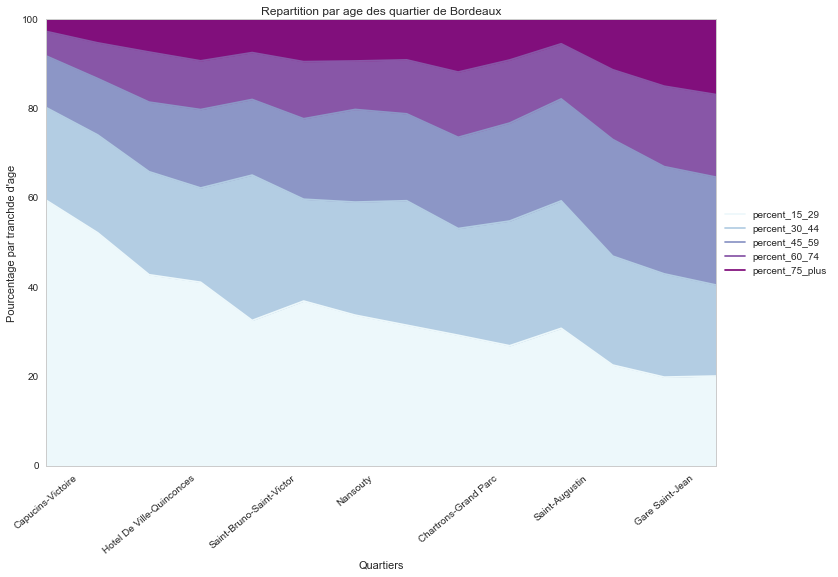

In [437]:
colors = ['#edf8fb','#b3cde3','#8c96c6','#8856a7','#810f7c']
list_quartier = bdx_celib_age_grp_quart.LIBGEO_grp.unique().tolist()
ax = bdx_celib_age_grp_quart[['LIBGEO_grp', 'percent_15_29', 'percent_30_44', 'percent_45_59', 
                         'percent_60_74', 'percent_75_plus']].plot.area(x='LIBGEO_grp', color=colors, 
                                                                       figsize= (12, 8), title='Repartition par age des quartier de Bordeaux',
                                                                       ylim=(0,100))
                        #.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Pourcentage par tranchde d'age")
ax.set_xlabel("Quartiers")
ax.set_xticklabels(list_quartier, rotation=40)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Nombre d'accidents en vélo ?

Période 2006-2011.

Licence ODbL © IdeesLibres.org 05/2014, Participants de l'OpenDataCamp 16/04/2014, Ministère de l’Intérieur 04/2014

In [62]:
bike_accident = pd.read_csv('data/accident_bike_com.csv', dtype={'com': np.dtype('str')})
bike_accident.head()

,COM,accident_velo
0,01034,1
1,01043,2
2,01049,1
3,01053,41
4,01143,3


In [67]:
france_ville_metro = france.groupby(['COM', 'LIBCOM', 'is_metropole', 'metropole_name']).sum().reset_index()

In [71]:
ville_metro_acc_bike = france_ville_metro.merge(bike_accident, how='left', on='COM')

In [73]:
ville_metro_acc_bike.accident_velo.fillna(0, inplace=True)

In [77]:
metro_acc_bike = ville_metro_acc_bike.groupby('metropole_name')['accident_velo'].sum().reset_index()

In [84]:

metro_acc_bike.sort_values('accident_velo', ascending=0, inplace=True)
metro_acc_bike

,metropole_name,accident_velo
0,Bordeaux,1479.0
7,Rennes,764.0
3,Lille,570.0
5,Nantes,549.0
9,Strasbourg,505.0
2,Grenoble,230.0
6,Nice,190.0
4,Montpellier,167.0
10,Toulouse,133.0
8,Rouen,33.0


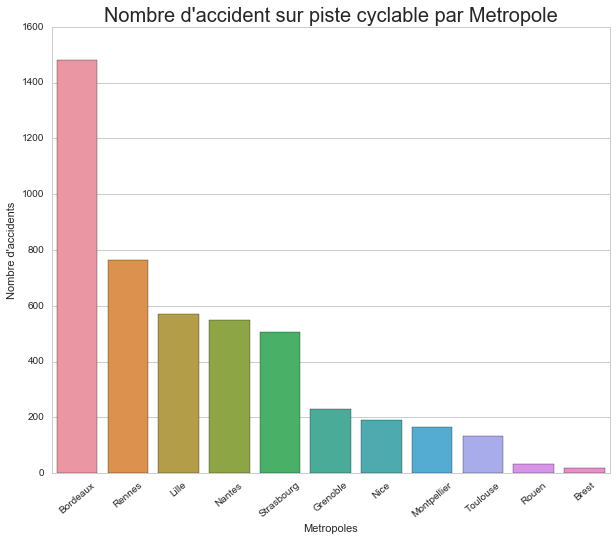

In [98]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="metropole_name", y="accident_velo", data=metro_acc_bike)
ax.set_ylabel("Nombre d'accidents")
ax.set_xlabel("Metropoles")
ax.set_xticklabels(metro_acc_bike.metropole_name.tolist(), rotation=40)
ax.set_title("Nombre d'accident sur piste cyclable par Metropole", fontsize=20)


## Bordeaux cinéphile ?

Données sur des communes de plus 50 000 habitants

### Bordeaux vs France

In [178]:
cinema = pd.read_csv('data/taux-doccupation-des-fauteuils-de-cinema-par-commune-de-50-000-habitants-ou-plus.csv', 
                     sep=";", dtype={"Code INSEE" : np.dtype('str')})

In [179]:
cinema.head()

,Code INSEE,Commune,Année,Taux d'occupation
0,2A004,Ajaccio,2014,8.861233
1,2A004,Ajaccio,2008,4.654162
2,2A004,Ajaccio,2011,6.239665
3,80021,Amiens,2005,14.204821
4,80021,Amiens,2013,14.532247


In [180]:
mean_france = cinema.groupby(["Année"])["Taux d'occupation"].mean().reset_index()

In [181]:
mean_france.columns = ['year', 'France']
mean_france.head()

,year,France
0,2003,14.331516
1,2004,16.205631
2,2005,15.299827
3,2006,15.749999
4,2007,14.709684


In [182]:
mean_bdx = cinema[cinema['Code INSEE'] == '33063'].groupby(["Année"])["Taux d'occupation"].mean().reset_index()

In [183]:
mean_bdx.columns = ['year', 'Bordeaux']
mean_bdx.head()

,year,Bordeaux
0,2003,14.387478
1,2004,15.222108
2,2005,17.523986
3,2006,18.899919
4,2007,17.340010


In [184]:
mean_fr_vs_bdx = mean_france.merge(mean_bdx, on='year', how='inner')
mean_fr_vs_bdx

,year,France,Bordeaux
0,2003,14.331516,14.387478
1,2004,16.205631,15.222108
2,2005,15.299827,17.523986
3,2006,15.749999,18.899919
4,2007,14.709684,17.340010
5,2008,15.174206,17.923856
6,2009,15.624422,19.797095
7,2010,15.644098,18.023047
8,2011,16.225747,16.835594
9,2012,15.121988,16.679001


In [ ]:
y_pos = gender_degree_data[column.replace("\n", " ")].values[-1] - 0.5   

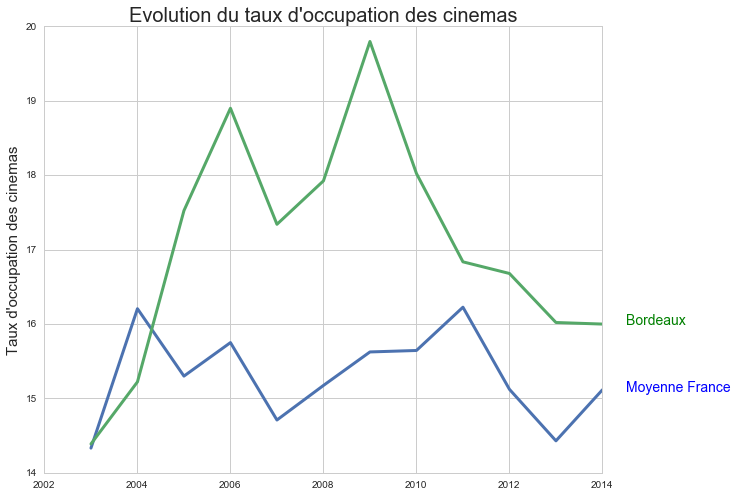

In [212]:
plt.figure(figsize=(10, 8))
plt.plot(mean_fr_vs_bdx.year, mean_fr_vs_bdx.France, lw=3, label="Moyenne France")
plt.plot(mean_fr_vs_bdx.year, mean_fr_vs_bdx.Bordeaux, lw=3)
plt.ylabel("Taux d'occupation des cinemas", fontsize=15)
plt.title("Evolution du taux d'occupation des cinemas", fontsize=20)

plt.text(2014.5, 16, "Bordeaux", fontsize=14, color="g")
plt.text(2014.5, 15.1, "Moyenne France", fontsize=14, color="b")

### Comparison du taux d'occupation des cinéma entre les métropoles :

In [362]:
mean_fr_vs_bdx.set_index('year', inplace=True)
mean_fr_vs_bdx = mean_fr_vs_bdx.stack().reset_index()
mean_fr_vs_bdx.columns = ['year', 'lieux', 'taux occupation']

In [363]:
code_insee_metropole = france[['COM', 'metropole_name']][~pd.isnull(france.metropole_name)].groupby(['COM','metropole_name']).size().reset_index()

In [364]:
code_insee_metropole.head()

,COM,metropole_name,0
0,06006,Nice,1
1,06009,Nice,1
2,06011,Nice,1
3,06013,Nice,1
4,06020,Nice,1


In [365]:
cine_metropole = cinema.merge(code_insee_metropole, how='inner', left_on='Code INSEE', right_on='COM')
cine_metropole.head(15)

,Code INSEE,Commune,Année,Taux d'occupation,COM,metropole_name,0
0,33063,Bordeaux,2007,17.340010,33063,Bordeaux,89
1,33063,Bordeaux,2004,15.222108,33063,Bordeaux,89
2,33063,Bordeaux,2014,15.999016,33063,Bordeaux,89
3,33063,Bordeaux,2011,16.835594,33063,Bordeaux,89
4,33063,Bordeaux,2009,19.797095,33063,Bordeaux,89
5,33063,Bordeaux,2013,16.020144,33063,Bordeaux,89
6,33063,Bordeaux,2010,18.023047,33063,Bordeaux,89
7,33063,Bordeaux,2003,14.387478,33063,Bordeaux,89
8,33063,Bordeaux,2006,18.899919,33063,Bordeaux,89
9,33063,Bordeaux,2005,17.523986,33063,Bordeaux,89


In [366]:
cine_metropole = cine_metropole.groupby(['metropole_name', 'Année'])["Taux d'occupation"].mean().reset_index()

In [367]:
colors = sns.color_palette("Set2", 11)

In [368]:
metro_cine_2014 = cine_metropole[cine_metropole["Année"] == 2014]

In [369]:
metro_cine_2014.sort_values("Taux d'occupation" ,ascending=0, inplace=True)
metropole_sorted_2014 = metro_cine_2014.metropole_name.tolist()

/Users/babou/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


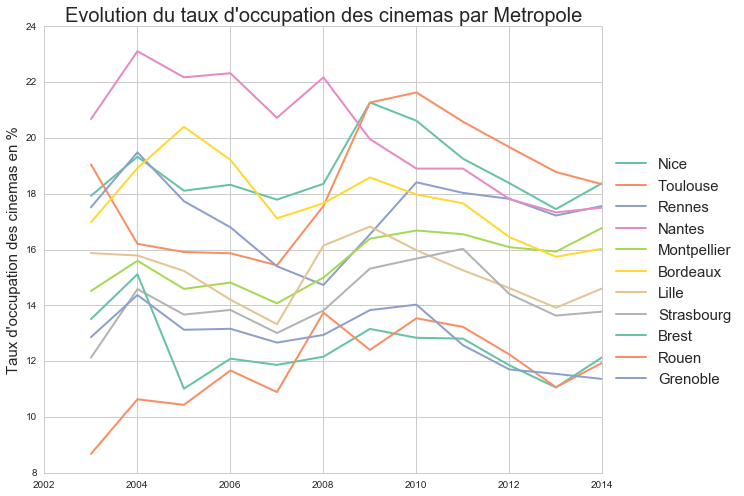

In [370]:
plt.figure(figsize=(10, 8))
for idx, metropole in enumerate(metropole_sorted_2014):
    plt.plot(cine_metropole['Année'][cine_metropole.metropole_name == metropole], 
             cine_metropole["Taux d'occupation"][cine_metropole.metropole_name == metropole],
             lw=2, label=metropole, color= colors[idx])
                                                     
plt.ylabel("Taux d'occupation des cinemas en %", fontsize=15)
plt.title("Evolution du taux d'occupation des cinemas par Metropole", fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.45), fontsize=15)

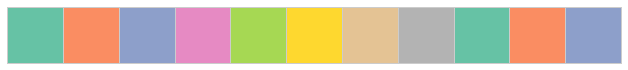

In [377]:
sns.palplot(sns.color_palette("Set2", 11))